In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ccxt
print ("Libraries installed successfully Eagle!")

Libraries installed successfully Eagle!


                 timestamp           open           high            low  \
count                   30      30.000000      30.000000      30.000000   
mean   2024-11-29 12:00:00   96027.614667   98053.694333   94381.262667   
min    2024-11-15 00:00:00   87318.830000   91410.390000   87067.400000   
25%    2024-11-22 06:00:00   93400.392500   96327.055000   91986.785000   
50%    2024-11-29 12:00:00   96880.510000   98542.875000   94561.240000   
75%    2024-12-06 18:00:00   98509.832500  100986.607500   96319.247500   
max    2024-12-14 00:00:00  101341.720000  103985.030000  101097.810000   
std                    NaN    3720.102589    3454.698836    3421.220212   

               close      volume  price_change  percent_change  
count      30.000000   30.000000     30.000000       30.000000  
mean    96500.028667   41.500871    472.414000        0.527023  
min     89792.000000    5.086020  -4907.840000       -5.012677  
25%     94652.707500   24.493467   -897.455000       -0.921352  

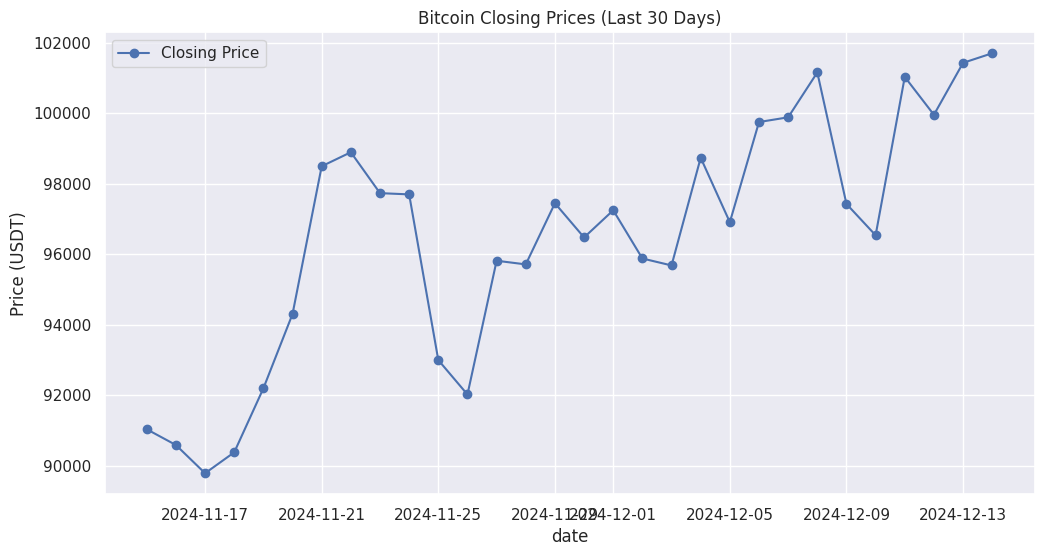

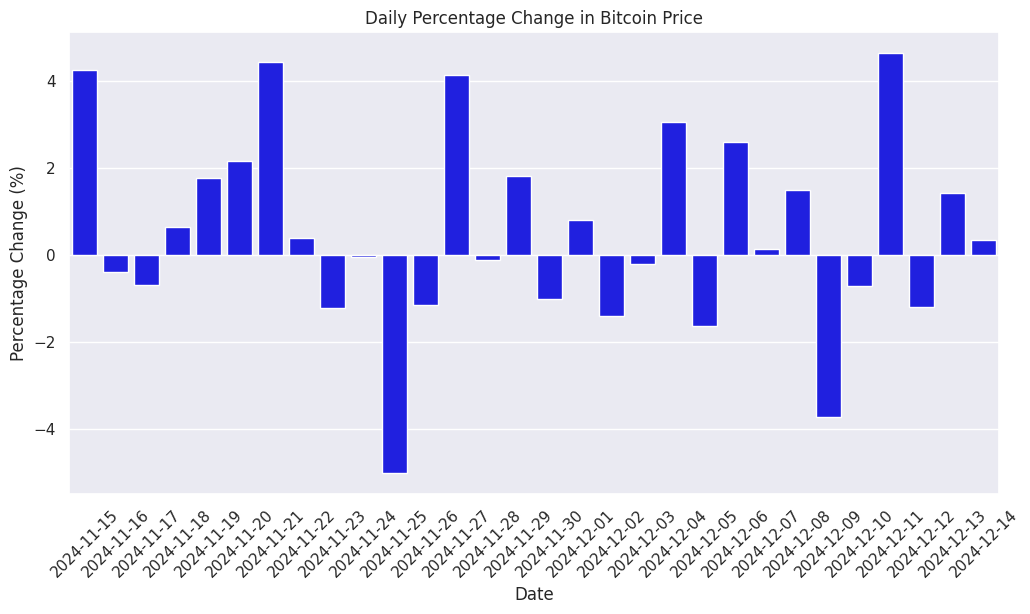

In [7]:
import ccxt
import pandas as pd

#Initialize the Binance exchange
exchange = ccxt.binanceus()

#Fetch historical OHLCV data for Bitcoin (BTC/USDT) - Last 30 days, 1-day timeframe
ohlcv = exchange.fetch_ohlcv('BTC/USDT', timeframe='1d', limit=30)

#Create a Dataframe for better readability
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df = pd.DataFrame(ohlcv, columns=columns)

# Convert the timestamp to a readable date format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Display the first few rows of the DataFrame
df.head()

# Calculate daily price change 
df['price_change'] = df['close'] - df['open']

# Add a percentage change column
df['percent_change'] = (df['price_change'] / df['open']) * 100

# Display summary statistics
print(df.describe())

# View the updated DataFrame
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="darkgrid")

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], marker='o', label='Closing Price')
plt.title('Bitcoin Closing Prices (Last 30 Days)')
plt.xlabel('date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()

#Plot percentage changes
plt.figure(figsize=(12, 6))
sns.barplot(x=df['timestamp'], y=df['percent_change'], color='blue')
plt.title('Daily Percentage Change in Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.show()
